imported packages

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
from collections import Counter
from PIL import Image
import random
import math

# Utils

generate image from flat array

In [38]:
def generate_from_flat(width,height,flat_array):
    image =np.zeros((height,width),np.int32)
    for i in range(height):
        image[i] = flat_array[i*width:width*(i+1)]
    return image

def extract_from_struct(data):
    return data[0],data[1],data[2],data[3]

# Manipulation of pgm files

Reading a pgm file

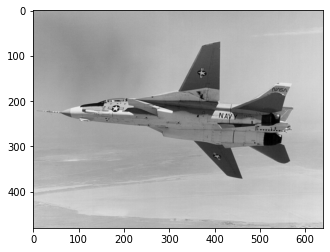

In [39]:
def readpgm(path):
    try:
        f = open(path, 'r')
        t = f.readline()
    except UnicodeDecodeError:
        f = open(path, 'rb')
        t = f.readline().decode()
    if t == 'P2\n':
        data = readpgma(f)
    elif t == 'P5\n':
        data = readpgmb(f)
    else:
        print("can't read file !")
        return False

    return data

def readpgma(f):

    lines = f.readlines()

    # Ignores commented lines
    for l in list(lines):
        if l[0] == '#':
            lines.remove(l)
    
    # Get width and height of the image
    width,height =[int(c) for c in lines[0].split()]
    
    # get maximum of grey level
    max_l = int(lines[1])

    # Converts data to a list of integers
    data = []
    for line in lines[2:]:
        data.extend([int(c) for c in line.split()])
    
    image = generate_from_flat(width,height,data)
        
    plt.imshow(Image.fromarray(image)) # Usage example

    return (width,height,max_l,image)

def readpgmb(f):
    
    while True:
        line = f.readline()
        if line[0] != '#':
             break

    # Get width and height of the image
    width,height =[int(c) for c in line.split()]
    max_l = int(f.readline())
    data = []
    byte = f.read(1)
    while byte:       
        data.append(ord(byte))
        byte = f.read(1)
    # print(f.readline().decode())
    # data = list(f.read(height * width))
    
    image = generate_from_flat(width,height,data)
        
    plt.imshow(Image.fromarray(image)) # Usage example

    return (width,height,max_l,image)

data = readpgm('images/image4.pgm')


Writing a pgm photo

(640,
 480,
 255,
 array([[164, 164, 162, ..., 198, 200, 197],
        [161, 165, 165, ..., 198, 199, 198],
        [164, 166, 163, ..., 198, 197, 199],
        ...,
        [199, 196, 192, ..., 208, 206, 204],
        [196, 192, 189, ..., 207, 210, 208],
        [189, 191, 187, ..., 201, 204, 204]]))

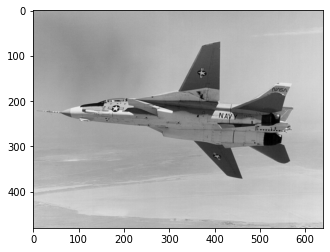

In [40]:
def writepgm(data,name):

    width,height,max_l,image = extract_from_struct(data)

    f = open(f"my_images/{name}.pgm", "w")
    
    f.write("P2\n")
    f.write("# This is my image\n")
    f.write(f"{width} {height}\n")

    flat_image = image.flatten('C')
    
    f.write(f"{max_l}\n")

    for i in flat_image:
        f.write(f'{i} ')

    f.close()

writepgm(data,"File1")
readpgm("my_images/File1.pgm")

Mean and variance of an image

In [41]:
def stat_image(data):

    width,height,max_l,image = extract_from_struct(data)
    flat_image = image.flatten('C')

    mean = np.mean(flat_image)
    var = np.var(flat_image)

    return (mean,var)

mean,var = stat_image(data)

print(f"Mean is {mean}")
print(f"Variance is {var}")


Mean is 167.273232421875
Variance is 1600.0618902675947


histogram

Counter({187: 6634, 186: 6591, 188: 6311, 185: 5697, 189: 5565, 190: 5232, 184: 5013, 191: 4840, 164: 4722, 163: 4689, 166: 4604, 192: 4553, 165: 4540, 193: 4498, 183: 4389, 167: 4378, 162: 4370, 198: 4286, 199: 4201, 203: 4124, 168: 4114, 197: 4084, 200: 4083, 195: 4073, 194: 4055, 202: 4042, 204: 4025, 196: 4022, 161: 4005, 201: 3978, 175: 3963, 176: 3960, 181: 3866, 182: 3866, 169: 3841, 179: 3835, 177: 3794, 178: 3786, 205: 3780, 174: 3775, 180: 3734, 173: 3696, 170: 3656, 171: 3637, 172: 3613, 160: 3485, 206: 3328, 207: 3050, 159: 3005, 208: 2960, 209: 2818, 158: 2619, 157: 2367, 210: 2354, 156: 2269, 155: 2148, 211: 2089, 154: 2043, 152: 1999, 153: 1944, 151: 1846, 150: 1842, 148: 1771, 149: 1743, 147: 1732, 145: 1732, 146: 1659, 212: 1622, 144: 1561, 143: 1360, 213: 1356, 142: 1192, 141: 1045, 214: 1013, 140: 1011, 135: 956, 136: 950, 138: 926, 134: 904, 133: 903, 139: 897, 137: 894, 131: 824, 215: 813, 130: 813, 132: 797, 128: 788, 129: 770, 53: 728, 127: 725, 52: 717, 51: 706,

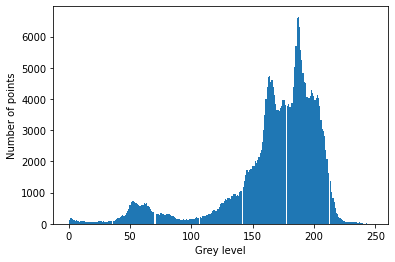

In [42]:
def histogram(data):
    width,height,max_l,image = extract_from_struct(data)
    flat_image = image.flatten('C')
    print(Counter(flat_image))
    plt.hist(flat_image,bins=data[2])
    plt.xlabel('Grey level')
    plt.ylabel('Number of points')
    plt.show()
histogram(data)

Cumulitive Histogram

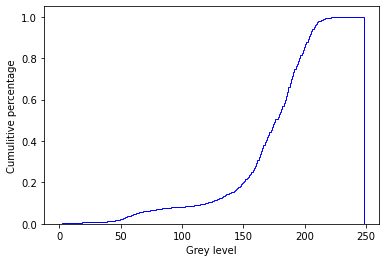

In [43]:
def Cumulitive_histogram(data):
    width,height,max_l,image = extract_from_struct(data)
    flat_image = image.flatten('C')
    plt.hist(flat_image, bins = max_l, cumulative = True, histtype = 'step', density = True, color = 'blue')
    plt.xlabel('Grey level')
    plt.ylabel('Cumulitive percentage')
    plt.show()
Cumulitive_histogram(data)

Histogram and cumulitive histogram

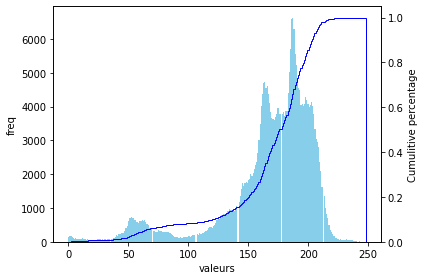

In [44]:
def Full_histogram(data):
    width,height,max_l,image = extract_from_struct(data)
    flat_image = image.flatten('C')
    plt.hist(flat_image, bins = max_l, color = 'skyblue')
    plt.xlabel('valeurs')
    plt.ylabel('freq')
    ax2 = plt.gca().twinx()
    ax2.hist(flat_image, bins = max_l, cumulative = True, histtype = 'step', density = True, color = 'blue')
    ax2.set_ylabel('Cumulitive percentage')
    plt.tight_layout()
Full_histogram(data)

# Second Part : Contrast Changing

640


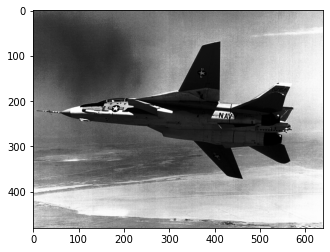

In [45]:
def Histogram_egalisation(data):
    width,height,max_l,image = extract_from_struct(data)

    new_val = width * height // max_l 
    flat_image = image.flatten('C')
    counter_image = Counter(flat_image)

    H_n =np.zeros(max_l+1,np.int32)
    for i in range(max_l+1):
        H_n[i] = counter_image[i]

    P_n = np.zeros(max_l+1,np.float16)
    for i in range(max_l+1):
        P_n[i] = H_n[i]/(width * height)

    Pc_n = np.zeros(max_l+1,np.float16)
    Pc_n[0] = P_n[0]
    for i in range(1,max_l+1):
        Pc_n[i] = Pc_n[i-1]+P_n[i]

    Hp_n = [new_val] * (max_l+1)

    A = np.zeros(max_l+1,np.float16)
    for i in range(max_l+1):
        A[i] = max_l * Pc_n[i]
    
    n1 =  np.zeros(max_l+1,np.int16)
    for i in range(max_l+1):
        n1[i] = int(A[i])
    
    new_image =np.zeros(height*width,np.int32)
    for i in range(len(flat_image)):
        new_image[i] = n1[flat_image[i]]
    
    final_image = generate_from_flat(width,height,new_image)

    plt.imshow(Image.fromarray(final_image))

 
    print( width)
    return (width,height,max_l,final_image)

new_data = Histogram_egalisation(data)



histogram

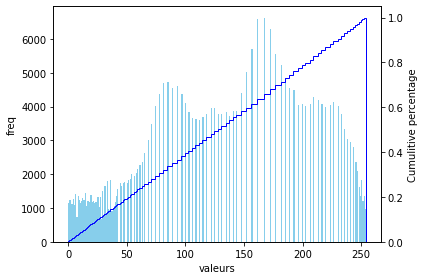

In [46]:
Full_histogram(new_data)

Contrast modification

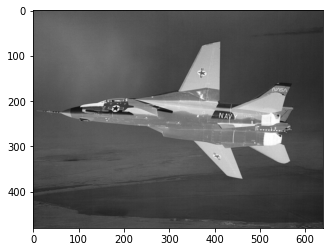

In [47]:
class Point:
    def __init__(self,x,y,max_n):
        self.x = fix_point(x,max_n)
        self.y = fix_point(y,max_n)
        
def fix_point(x,max_n):
    if (x < 0): 
        print(f"{x} not in 0 - 255 ( {x} < 0 ) ------> fixing to 0")
        return 0
    if (x > max_n):
        print(f"{x} not in 0 - 255 ( {x} > {max_n} ) ------> fixing to {max_n}")
        return max_n
    return x

def check_points(A,B):
    if(A.x < B.x):
        return True
    else: return False

def contrast_modifier(A,B,data):

    if(check_points(A,B) == False):
        print("invalid points")
        return False
    
    width,height,max_l,image = extract_from_struct(data)

    new_GL =np.zeros(max_l+1,np.int32)
    for i in range(len(new_GL)):
        if(A.x != 0 ):
            if(i < A.x):
                new_GL[i] = i * (A.y//A.x)

            if(i < B.x):
                new_GL[i] = i * ((B.y - A.y)//(B.x - A.x)) + ( A.y - ((B.y - A.y)//(B.x - A.x)) * A.x )

            if(i >= B.x):
                new_GL[i] = i * ((max_l - B.y)//(max_l - B.x)) + ( B.y - ((max_l - B.y)//(max_l - B.x)) * B.x  )
        elif(A.y != 0):
            if(i <= B.x):
                new_GL[i] = i * ((B.y - A.y)//(B.x - A.x)) + A.y

            if(i > B.x):
                new_GL[i] = i * ((max_l - B.y)//(max_l - B.x)) + ( B.y - ((max_l - B.y)//(max_l - B.x)) * B.x  )
        else:
            if(i <= B.x):
                new_GL[i] = i * (B.y//B.x)

            if(i > B.x):
                new_GL[i] = i * ((max_l - B.y)//(max_l - B.x)) + ( B.y - ((max_l - B.y)//(max_l - B.x)) * B.x  )

    flat_image = image.flatten('C')
    
    for i in range(len(flat_image)):
        if(new_GL[flat_image[i]] > max_l):
            flat_image[i] = max_l
        else:
            flat_image[i] = new_GL[flat_image[i]]

    final_image = generate_from_flat(width,height,flat_image)
    
    plt.imshow(Image.fromarray(final_image))

    return (width,height,max_l,final_image)
    
contrast_data = contrast_modifier(Point(0,255,data[2]),Point(255,0,data[2]),data)    

Histogram

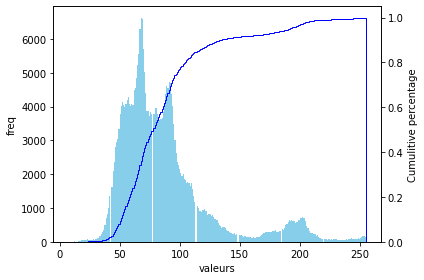

In [48]:
Full_histogram(contrast_data)

# Third Part : Filters

add defects

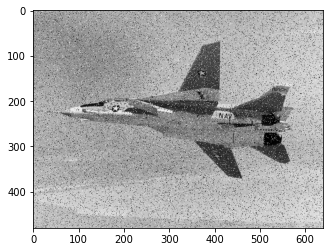

In [49]:
def add_noise(data):
    width,height,max_l,image = extract_from_struct(data)
    flat_image = image.flatten('C')
    for i in range(len(flat_image)):
        r = random.randint(0,20)
        if(r == 0):
            flat_image[i] = 0
        elif(r == 20):
            flat_image[i] = max_l
    
    new_image = generate_from_flat(width,height,flat_image)
    
    plt.imshow(Image.fromarray(new_image))

    return (width,height,max_l,new_image)

noise_data = add_noise(data)

Convolution

In [50]:
def convolution(data,filt,size,isGauss = False):

    width,height,max_l,image = extract_from_struct(data)

    if (isGauss == False):
        avg = 1 / pow(size,2)
    
    border = size//2

    new_image = generate_from_flat(width,height,image.flatten('C'))

    for i in range(border,height-border):
        for j in range(border,width-border):
            sum_l = 0
            for k in range(i-border,i+border+1):
                for f in range(j-border,j+border+1):
                    sum_l += new_image[k][f] * filt[k - i][f - j]    
            if (isGauss == False):
                new_image[i][j] = int(sum_l * avg) 
            else:
                new_image[i][j] = int(sum_l) 
    
    for i in range(height):
        if(i < border):
            for j in range(width):
                new_image[i][j] = 0
                new_image[height - i -1][j] = 0
        else:
            for j in range(border):
                new_image[i][j] = 0
                new_image[i][width - j  -1] = 0

    plt.imshow(Image.fromarray(new_image))

    return width,height,max_l,new_image

def convolution_no_average(data,filt,size):

    width,height,max_l,image = extract_from_struct(data)

    avg = 1 / pow(size,2)
    border = size//2

    new_image = generate_from_flat(width,height,image.flatten('C'))

    for i in range(border,height-border):
        for j in range(border,width-border):
            sum_l = 0
            for k in range(i-border,i+border+1):
                for f in range(j-border,j+border+1):
                    sum_l += new_image[k][f] * filt[k - i][f - j]    
            if (sum_l < 0):
                sum_l = 0
            if (sum_l > max_l):
                sum_l = max_l
            new_image[i][j] = int(sum_l)  
    
    for i in range(height):
        if(i < border):
            for j in range(width):
                new_image[i][j] = 0
                new_image[height - i -1][j] = 0
        else:
            for j in range(border):
                new_image[i][j] = 0
                new_image[i][width - j  -1] = 0

    plt.imshow(Image.fromarray(new_image))

    return width,height,max_l,new_image


Average filter

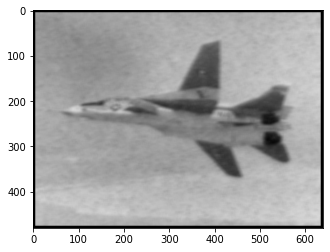

In [51]:
def average_filter(data, size):
    if (size % 2 == 0):
        size += 1
    filt = np.ones((size,size),np.int32)
    data =  convolution(data, filt, size)
    return data

average_image_data = average_filter(noise_data,11)

Median filter

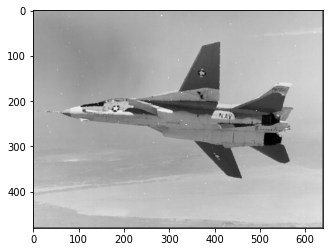

In [52]:
def median_filter(data, size):
    if (size % 2 == 0):
        size += 1
        
    width,height,max_l,image = extract_from_struct(data)

    border = size//2

    new_image = generate_from_flat(width,height,image.flatten('C'))
    
    for i in range(border,height-border):
        for j in range(border,width-border):
            medians = []
            for k in range(i-border,i+border+1):
                for f in range(j-border,j+border+1):
                    medians.append(image[k][f])
            medians.sort()
            new_image[i][j] = medians[len(medians) // 2 + 1] 
    
    for i in range(height):
        if(i < border):
            for j in range(width):
                new_image[i][j] = 0
                new_image[height - i -1][j] = 0
        else:
            for j in range(border):
                new_image[i][j] = 0
                new_image[i][width - j  -1] = 0
                
    plt.imshow(Image.fromarray(new_image))

    return width,height,max_l,new_image

median_image_data = median_filter(noise_data,3)

High filter

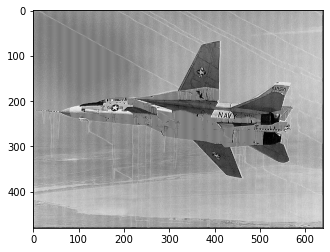

In [53]:
def high_filter(data):
    filt = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    data = convolution_no_average(data, filt, 3)
    return data
    
high_image_data = high_filter(data)

Laplace filter

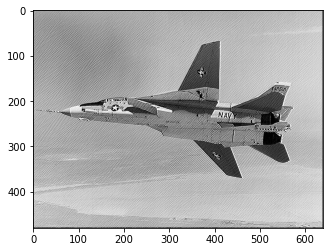

In [54]:
def laplace_filter(data):
    filt = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    data = convolution_no_average(data, filt, 3)
    return data
    
laplace_image_data = laplace_filter(data)

SNR : Signal to noise ration

In [55]:
def SNR(orig_data,new_data):
    mean,var = stat_image(orig_data)

    width,height,max_l,image = extract_from_struct(orig_data)
    width_new,height_new,max_l_new,image_new = extract_from_struct(new_data)

    S = 0
    B = 0
    for i in range(height):
        for j in range(width):
            S += (image[i][j] - mean) ** 2
            B += (image_new[i][j] - image[i][j]) ** 2
    if (B == 0):
        return 0.0

    snr = math.sqrt(S / B)
    print(f"SNR = {snr} ")
    return snr

SNR(noise_data,average_image_data)
SNR(noise_data,median_image_data)


SNR = 1.0104897504913843 
SNR = 1.2220618215614758 


1.2220618215614758

gaussien filter

(640,
 480,
 255,
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  0, 163, 164, ..., 148, 170,   0],
        [  0, 163, 164, ..., 165, 177,   0],
        ...,
        [  0, 200, 200, ..., 173, 198,   0],
        [  0, 196, 208, ..., 200, 207,   0],
        [  0,   0,   0, ...,   0,   0,   0]]))

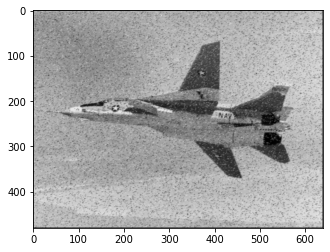

In [56]:
def gauss_filter(data, size):
    if (size % 2 == 0):
        size += 1
    filt = np.ones((size,size),np.float64)
    sum = 0
    center = size // 2
    for py in range(-center, center + 1):
        for px in range(-center, center + 1):
            filt[py + center][px + center] = 2 ** (center ** 2 - abs(py) - abs(px))
            sum += filt[py + center][px + center]
    for py in range(-center, center + 1):
        for px in range(-center, center + 1):
            filt[py + center][px + center] /= sum
    return convolution(data, filt, size, True)

gauss_filter(noise_data,3)

# Fourth Part: Otsu algorithm

160


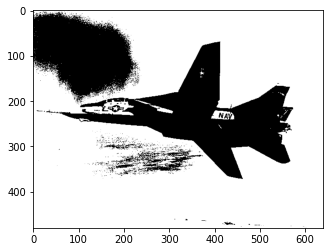

In [57]:
def otsu(data):
    width,height,max_l,image = extract_from_struct(data)

    flat_image = image.flatten("C")

    pixel_number = width * height
    mean_weigth = 1.0/pixel_number

    his, bins = np.histogram(flat_image, np.array(range(0, max_l+1)))
    final_thresh = -1
    final_value = -1
    for t in bins[1:-1]:
        Wb = np.sum(his[:t]) * mean_weigth
        Wf = np.sum(his[t:]) * mean_weigth

        mub = np.mean(his[:t])
        muf = np.mean(his[t:])

        value = Wb * Wf * (mub - muf) ** 2

        if value > final_value:
            final_thresh = t
            final_value = value
    
    print(final_thresh)
    final_image = flat_image.copy()
    final_image[flat_image > final_thresh] = 255
    final_image[flat_image < final_thresh] = 0
    new_image = generate_from_flat(width,height,final_image)

    plt.imshow(Image.fromarray(new_image))

otsu(data)